# Tobacco Use and Mortality (2004–2015)

## Problem Definition

### Objective
The objective of this project is to use machine learning techniques to analyze the relationship between tobacco use and mortality. We aim to predict mortality trends based on smoking prevalence, healthcare burden, and tobacco-related economic indicators.

### Scope
This study focuses on population-level data from 2004–2015 and includes:
- Smoking prevalence by age and gender
- Hospital admissions linked to smoking-related diseases
- Mortality (fatalities) due to smoking-related causes
- Tobacco cessation prescriptions
- Tobacco economic indicators (price, affordability)

The project will explore trends, correlations, and predictive modeling to understand how tobacco use impacts public health outcomes.


In [1]:
import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


In [ ]:
# Load the datasets
admissions = pd.read_csv("admissions.csv")
fatalities = pd.read_csv("fatalities.csv")
prescriptions = pd.read_csv("prescriptions.csv")
smokers = pd.read_csv("smokers.csv")
metrics = pd.read_csv("metrics.csv")

print("Fresh data loaded")


Fresh data loaded


In [3]:
print("Admissions Data")
display(admissions.head())

print("\nFatalities Data")
display(fatalities.head())

print("\nPrescriptions Data")
display(prescriptions.head())

print("\nSmokers Data")
display(smokers.head())

print("\nMetrics Data")
display(metrics.head())


Admissions Data


,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157



Fatalities Data


,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101



Prescriptions Data


,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0



Smokers Data


,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27



Metrics Data


,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8


In [ ]:
# Check for missing values
print("Admissions shape:", admissions.shape)
print("Fatalities shape:", fatalities.shape)
print("Prescriptions shape:", prescriptions.shape)
print("Smokers shape:", smokers.shape)
print("Metrics shape:", metrics.shape)


Admissions shape: (2079, 7)
Fatalities shape: (1749, 7)
Prescriptions shape: (11, 9)
Smokers shape: (84, 9)
Metrics shape: (36, 9)


In [ ]:
# Display info and missing values for each dataset
datasets = {
    "Admissions": admissions,
    "Fatalities": fatalities,
    "Prescriptions": prescriptions,
    "Smokers": smokers,
    "Metrics": metrics
}

for name, df in datasets.items():
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())



Admissions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB
None

Missing values in Admissions:
Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                693
Value                1
dtype: int64

Fatalities Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   

In [ ]:
# Check the unique years in each dataset
print("Admissions Years:", admissions['Year'].unique())
print("Fatalities Years:", fatalities['Year'].unique())
print("Prescriptions Years:", prescriptions['Year'].unique())
print("Smokers Years:", smokers['Year'].unique())
print("Metrics Years:", metrics['Year'].unique())


Admissions Years: ['2014/15' '2013/14' '2012/13' '2011/12' '2010/11' '2009/10' '2008/09'
 '2007/08' '2006/07' '2005/06' '2004/05']
Fatalities Years: [2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004]
Prescriptions Years: ['2014/15' '2013/14' '2012/13' '2011/12' '2010/11' '2009/10' '2008/09'
 '2007/08' '2006/07' '2005/06' '2004/05']
Smokers Years: [1974 1976 1978 1980 1982 1984 1986 1988 1990 1992 1994 1996 1998 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]
Metrics Years: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988
 1987 1986 1985 1984 1983 1982 1981 1980]


In [ ]:
# Extract the year from the 'Year' column, handling cases like '2010/11'
def extract_year(year):
    if isinstance(year, str) and '/' in year:
        return int(year.split('/')[0])
    return int(year)

admissions['Year'] = admissions['Year'].apply(extract_year)
prescriptions['Year'] = prescriptions['Year'].apply(extract_year)


In [ ]:
# Convert 'Value' columns to numeric, coercing errors to NaN
admissions['Value'] = pd.to_numeric(admissions['Value'], errors='coerce')
fatalities['Value'] = pd.to_numeric(fatalities['Value'], errors='coerce')


In [ ]:
# Clean column names in the metrics dataset
metrics.columns = metrics.columns.str.replace('\n', ' ', regex=True).str.strip()


In [ ]:
# Aggregate data by year for each dataset
admissions_yearly = admissions.groupby('Year')['Value'].mean().reset_index()
admissions_yearly.columns = ['Year', 'Avg_Admission_Rate']

fatalities_yearly = fatalities.groupby('Year')['Value'].mean().reset_index()
fatalities_yearly.columns = ['Year', 'Avg_Mortality_Rate']

smoking_yearly = smokers.groupby('Year')['16 and Over'].mean().reset_index()
smoking_yearly.columns = ['Year', 'Smoking_Prevalence']

prescriptions_yearly = prescriptions.groupby('Year')[
    ['All Pharmacotherapy Prescriptions', 'Net Ingredient Cost of All Pharmacotherapies']
].sum().reset_index()
prescriptions_yearly.columns = ['Year', 'Total_Prescriptions', 'Prescription_Cost']

metrics_yearly = metrics.groupby('Year')[
    ['Tobacco Price Index Relative to Retail Price Index',
     'Affordability of Tobacco Index',
     "Real Households' Disposable Income"]
].mean().reset_index()
metrics_yearly.columns = ['Year', 'Tobacco_Price_Relative', 'Tobacco_Affordability', 'Disposable_Income']


In [ ]:
# Merge all datasets on 'Year'
df = smoking_yearly.merge(admissions_yearly, on='Year', how='outer')
df = df.merge(fatalities_yearly, on='Year', how='outer')
df = df.merge(prescriptions_yearly, on='Year', how='outer')
df = df.merge(metrics_yearly, on='Year', how='outer')

df.sort_values('Year', inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()


,Year,Smoking_Prevalence,Avg_Admission_Rate,Avg_Mortality_Rate,Total_Prescriptions,Prescription_Cost,Tobacco_Price_Relative,Tobacco_Affordability,Disposable_Income
0,1974,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978,40.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980,39.333333,NaN,NaN,NaN,NaN,100.0,100.0,100.0
4,1981,NaN,NaN,NaN,NaN,NaN,110.4,89.7,99.1


In [ ]:
# Handle any remaining missing values by forward filling, then backward filling
df = df.ffill().bfill()


In [ ]:
# Create new features based on domain knowledge
df['Smoking_Duration_Proxy'] = df['Smoking_Prevalence'].cumsum()
df['Smoking_Trend'] = df['Smoking_Prevalence'].diff()
df['Mortality_per_Smoker'] = df['Avg_Mortality_Rate'] / df['Smoking_Prevalence']
df['Admission_per_Smoker'] = df['Avg_Admission_Rate'] / df['Smoking_Prevalence']
df['Prescription_per_Smoker'] = df['Total_Prescriptions'] / df['Smoking_Prevalence']
df['Affordability_Impact'] = df['Smoking_Prevalence'] / df['Tobacco_Affordability']
df['Income_Impact'] = df['Disposable_Income'] / df['Smoking_Prevalence']

df = df.dropna().reset_index(drop=True)


In [ ]:
# Final check of the cleaned and merged dataset
print("Final Shape:", df.shape)
df.head()


Final Shape: (38, 16)


,Year,Smoking_Prevalence,Avg_Admission_Rate,Avg_Mortality_Rate,Total_Prescriptions,Prescription_Cost,Tobacco_Price_Relative,Tobacco_Affordability,Disposable_Income,Smoking_Duration_Proxy,Smoking_Trend,Mortality_per_Smoker,Admission_per_Smoker,Prescription_per_Smoker,Affordability_Impact,Income_Impact
0,1976,42.000000,165148.654054,21777.146497,2044.0,46093.0,100.0,100.0,100.0,88.000000,-4.000000,518.503488,3932.110811,48.666667,0.420000,2.380952
1,1978,40.333333,165148.654054,21777.146497,2044.0,46093.0,100.0,100.0,100.0,128.333333,-1.666667,539.929252,4094.594729,50.677686,0.403333,2.479339
2,1980,39.333333,165148.654054,21777.146497,2044.0,46093.0,100.0,100.0,100.0,167.666667,-1.000000,553.656267,4198.694595,51.966102,0.393333,2.542373
3,1981,39.333333,165148.654054,21777.146497,2044.0,46093.0,110.4,89.7,99.1,207.000000,0.000000,553.656267,4198.694595,51.966102,0.438499,2.519492
4,1982,35.333333,165148.654054,21777.146497,2044.0,46093.0,117.3,84.2,98.7,242.333333,-4.000000,616.334335,4674.018511,57.849057,0.419636,2.793396


In [ ]:
# Filter the dataset to include only years from 2004 to 2014 for modeling
df = df[(df['Year'] >= 2004) & (df['Year'] <= 2014)]
df.reset_index(drop=True, inplace=True)

print("Final Shape After Year Filter:", df.shape)
df.head()


Final Shape After Year Filter: (11, 16)


,Year,Smoking_Prevalence,Avg_Admission_Rate,Avg_Mortality_Rate,Total_Prescriptions,Prescription_Cost,Tobacco_Price_Relative,Tobacco_Affordability,Disposable_Income,Smoking_Duration_Proxy,Smoking_Trend,Mortality_per_Smoker,Admission_per_Smoker,Prescription_per_Smoker,Affordability_Impact,Income_Impact
0,2004,24.666667,165148.654054,21777.146497,2044.0,46093.0,234.4,80.5,188.7,887.000000,-1.333333,882.857290,6695.215705,82.864865,0.306418,7.650000
1,2005,24.000000,172302.491892,21520.178344,2205.0,48092.0,237.8,80.1,190.6,911.000000,-0.666667,896.674098,7179.270495,91.875000,0.299625,7.941667
2,2006,22.000000,175944.848649,20780.840764,2079.0,44817.0,240.8,79.9,192.3,933.000000,-2.000000,944.583671,7997.493120,94.500000,0.275344,8.740909
3,2007,21.000000,180941.135135,20589.146497,2475.0,61479.0,243.1,80.6,195.9,954.000000,-1.000000,980.435547,8616.244530,117.857143,0.260546,9.328571
4,2008,21.333333,233245.389189,20762.382166,2263.0,57520.0,244.2,78.8,192.5,975.333333,0.333333,973.236664,10933.377618,106.078125,0.270728,9.023438


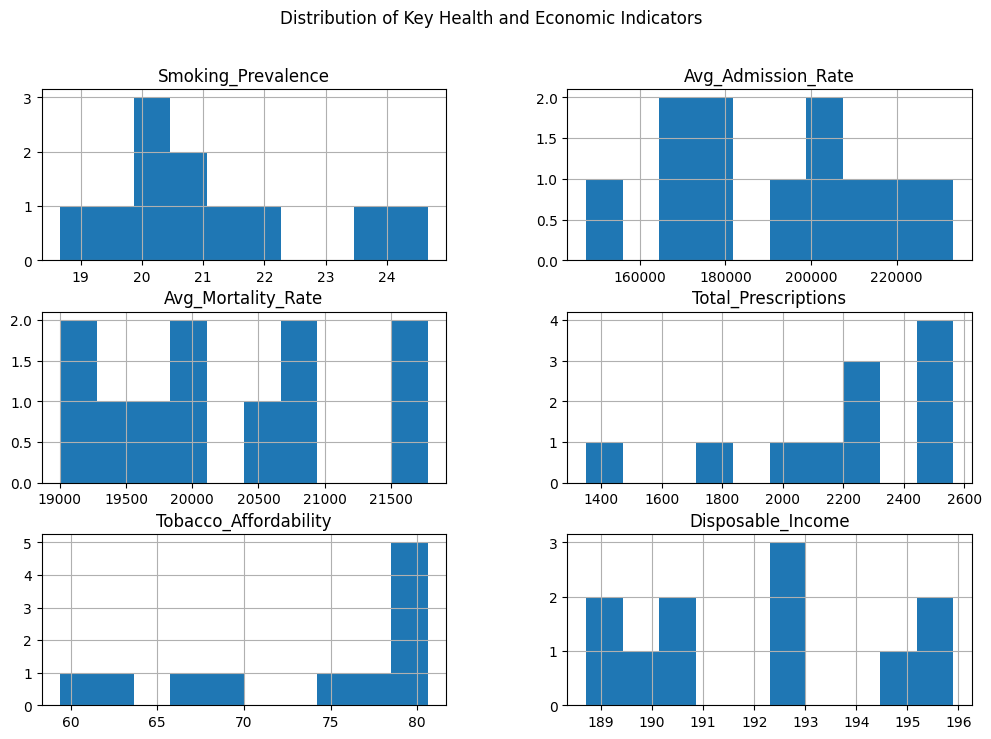

In [ ]:
# Visualize the distribution of key features
import matplotlib.pyplot as plt

features = [
    'Smoking_Prevalence',
    'Avg_Admission_Rate',
    'Avg_Mortality_Rate',
    'Total_Prescriptions',
    'Tobacco_Affordability',
    'Disposable_Income'
]

df[features].hist(figsize=(12,8))
plt.suptitle("Distribution of Key Health and Economic Indicators")
plt.show()


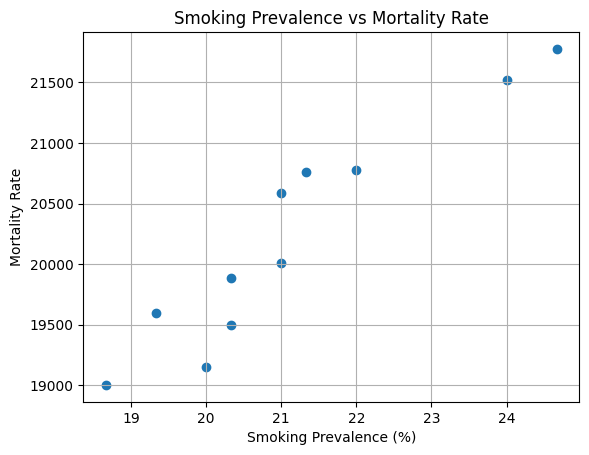

In [ ]:
# Visualize the relationship between smoking prevalence and mortality rate
plt.figure()
plt.scatter(df['Smoking_Prevalence'], df['Avg_Mortality_Rate'])
plt.title("Smoking Prevalence vs Mortality Rate")
plt.xlabel("Smoking Prevalence (%)")
plt.ylabel("Mortality Rate")
plt.grid(True)
plt.show()


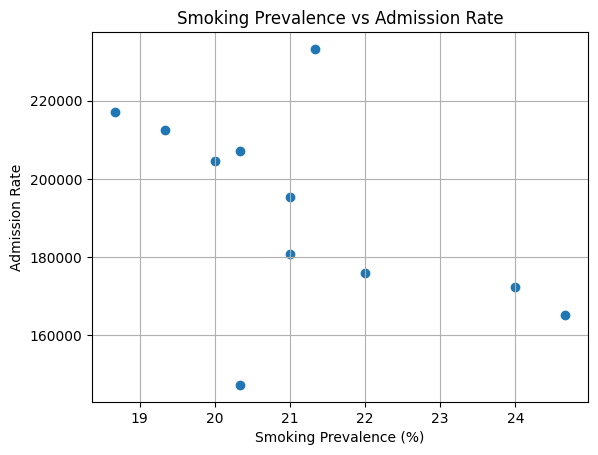

In [ ]:
# Visualize the relationship between smoking prevalence and admission rate
plt.figure()
plt.scatter(df['Smoking_Prevalence'], df['Avg_Admission_Rate'])
plt.title("Smoking Prevalence vs Admission Rate")
plt.xlabel("Smoking Prevalence (%)")
plt.ylabel("Admission Rate")
plt.grid(True)
plt.show()


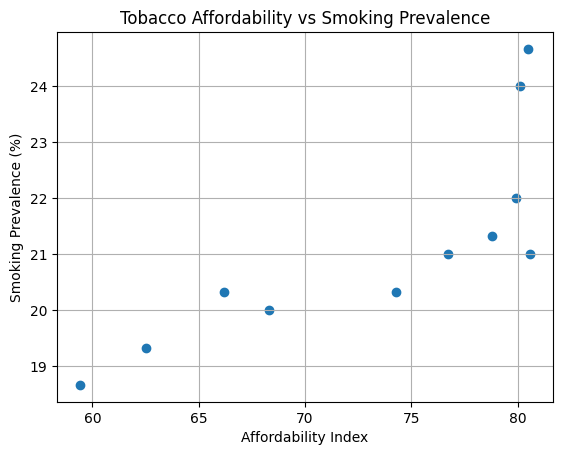

In [ ]:
# Visualize the relationship between tobacco affordability and smoking prevalence
plt.figure()
plt.scatter(df['Tobacco_Affordability'], df['Smoking_Prevalence'])
plt.title("Tobacco Affordability vs Smoking Prevalence")
plt.xlabel("Affordability Index")
plt.ylabel("Smoking Prevalence (%)")
plt.grid(True)
plt.show()


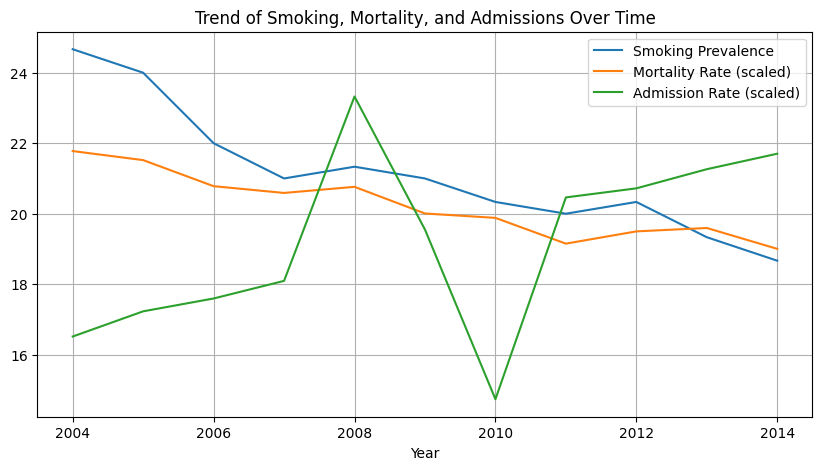

In [ ]:
# Visualize the trend of smoking prevalence, mortality rate, and admission rate over time
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Smoking_Prevalence'], label='Smoking Prevalence')
plt.plot(df['Year'], df['Avg_Mortality_Rate']/1000, label='Mortality Rate (scaled)')
plt.plot(df['Year'], df['Avg_Admission_Rate']/10000, label='Admission Rate (scaled)')

plt.title("Trend of Smoking, Mortality, and Admissions Over Time")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()


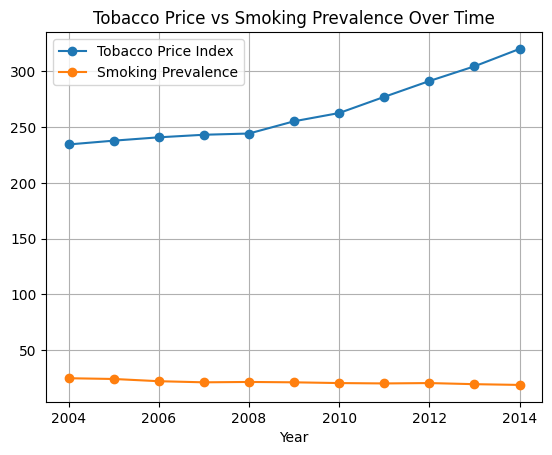

In [ ]:
# Visualize the relationship between tobacco price and smoking prevalence over time
plt.figure()
plt.plot(df['Year'], df['Tobacco_Price_Relative'], marker='o', label='Tobacco Price Index')
plt.plot(df['Year'], df['Smoking_Prevalence'], marker='o', label='Smoking Prevalence')

plt.title("Tobacco Price vs Smoking Prevalence Over Time")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()


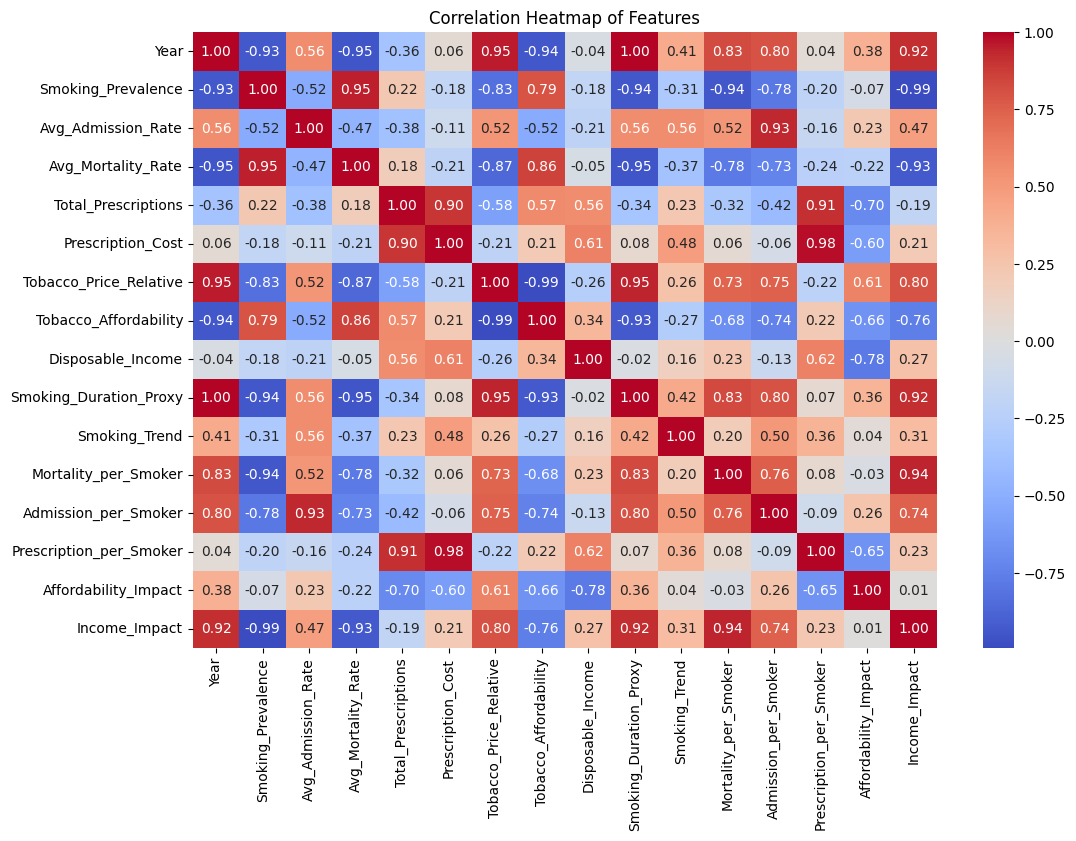

In [ ]:
# Correlation heatmap of features
import seaborn as sns

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
# Analyze correlation with the target variable (Avg_Mortality_Rate)
corr_target = corr['Avg_Mortality_Rate'].sort_values(ascending=False)
print("Correlation with Mortality Rate:\n")
print(corr_target)


Correlation with Mortality Rate:

Avg_Mortality_Rate        1.000000
Smoking_Prevalence        0.945614
Tobacco_Affordability     0.856083
Total_Prescriptions       0.175487
Disposable_Income        -0.049112
                            ...   
Mortality_per_Smoker     -0.781351
Tobacco_Price_Relative   -0.867064
Income_Impact            -0.927458
Year                     -0.951148
Smoking_Duration_Proxy   -0.954823
Name: Avg_Mortality_Rate, Length: 16, dtype: float64


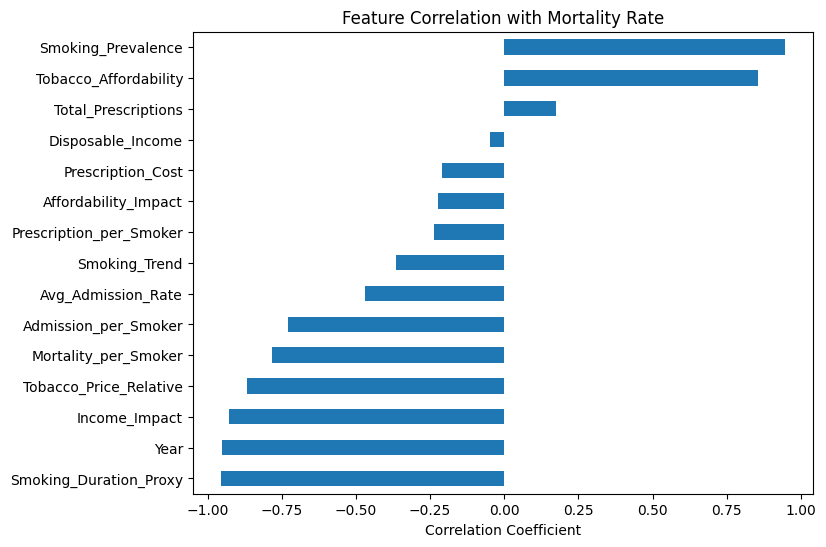

In [ ]:
# Visualize the correlation of features with the target variable (Avg_Mortality_Rate)
corr_target = df.corr(numeric_only=True)['Avg_Mortality_Rate'].drop('Avg_Mortality_Rate')

corr_target.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Correlation with Mortality Rate")
plt.xlabel("Correlation Coefficient")
plt.show()


In [25]:
# Create binary target: 1 = High mortality year, 0 = Low mortality year
median_mortality = df['Avg_Mortality_Rate'].median()
df['High_Mortality'] = (df['Avg_Mortality_Rate'] > median_mortality).astype(int)

df[['Year', 'Avg_Mortality_Rate', 'High_Mortality']]


,Year,Avg_Mortality_Rate,High_Mortality
0,2004,21777.146497,1
1,2005,21520.178344,1
2,2006,20780.840764,1
3,2007,20589.146497,1
4,2008,20762.382166,1
...,...,...,...
6,2010,19881.515924,0
7,2011,19150.535032,0
8,2012,19498.420382,0
9,2013,19594.751592,0


In [ ]:
# Prepare features and target for modeling
X = df.drop(columns=[
    'Year',
    'Avg_Mortality_Rate',
    'High_Mortality',
    'Mortality_per_Smoker'  # derived from mortality
])

y = df['High_Mortality']


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train a logistic regression model to predict high mortality years
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

log_preds = log_model.predict(X_test_scaled)


In [ ]:
# Train a decision tree classifier to predict high mortality years
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)


In [ ]:
# Train a random forest classifier to predict high mortality years
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)


In [ ]:
# Train a gradient boosting classifier to predict high mortality years
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_test)


In [ ]:
# Train a support vector machine classifier to predict high mortality years
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

svm_preds = svm_model.predict(X_test_scaled)


In [ ]:
# Train a neural network classifier to predict high mortality years
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=2000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

nn_preds = nn_model.predict(X_test_scaled)


In [ ]:
# Evaluate the models using accuracy score
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": log_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds,
    "Gradient Boosting": gb_preds,
    "SVM": svm_preds,
    "Neural Network": nn_preds
}

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.75
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
SVM Accuracy: 0.75
Neural Network Accuracy: 0.75


In [ ]:
# Perform cross-validation to evaluate model stability
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

log_cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print("Logistic Regression CV Accuracy:", log_cv_scores.mean())


Logistic Regression CV Accuracy: 0.8888888888888888


In [ ]:
# Decision trees and random forests do not require feature scaling, so we use the original X_train for them
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Random Forest CV Accuracy:", rf_cv_scores.mean())


Random Forest CV Accuracy: 0.7222222222222222


In [ ]:
# Gradient boosting also does not require feature scaling, so we use the original X_train for it
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Gradient Boosting CV Accuracy:", gb_cv_scores.mean())

Gradient Boosting CV Accuracy: 1.0


In [ ]:
# SVM and neural networks require scaling, so we use the scaled features for them
from sklearn.metrics import classification_report

print("Logistic Regression Report\n", classification_report(y_test, log_preds))
print("Random Forest Report\n", classification_report(y_test, rf_preds))
print("SVM Report\n", classification_report(y_test, svm_preds))


Logistic Regression Report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Random Forest Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

SVM Report
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg

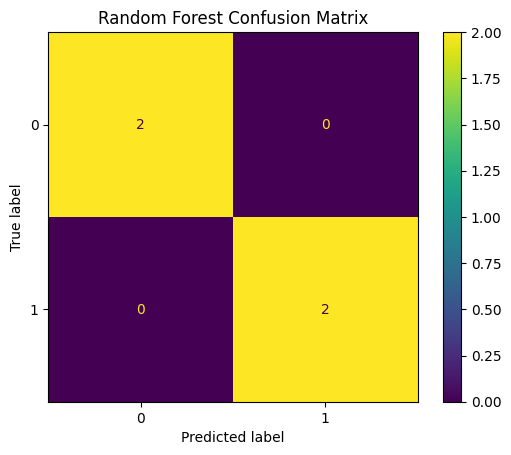

In [ ]:
# Visualize the confusion matrix for the Random Forest model
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds)
plt.title("Random Forest Confusion Matrix")
plt.show()


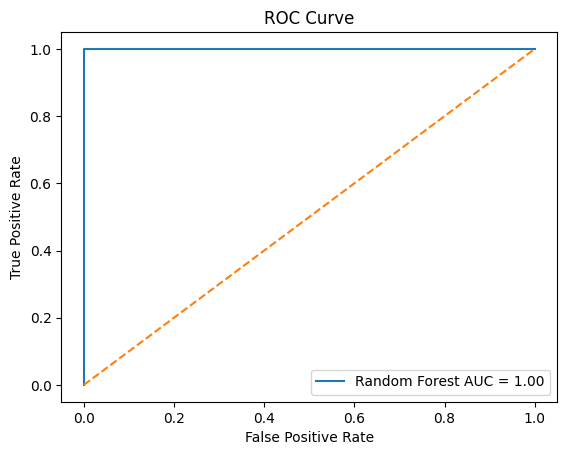

In [ ]:
# Plot ROC curve for Random Forest model
from sklearn.metrics import roc_curve, auc

rf_probs = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
# Perform hyperparameter tuning for the Random Forest model using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=cv,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.8888888888888888


In [ ]:
# Evaluate the best model from grid search on the test set
best_rf = grid_search.best_estimator_
best_preds = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_preds))


Tuned Random Forest Accuracy: 1.0


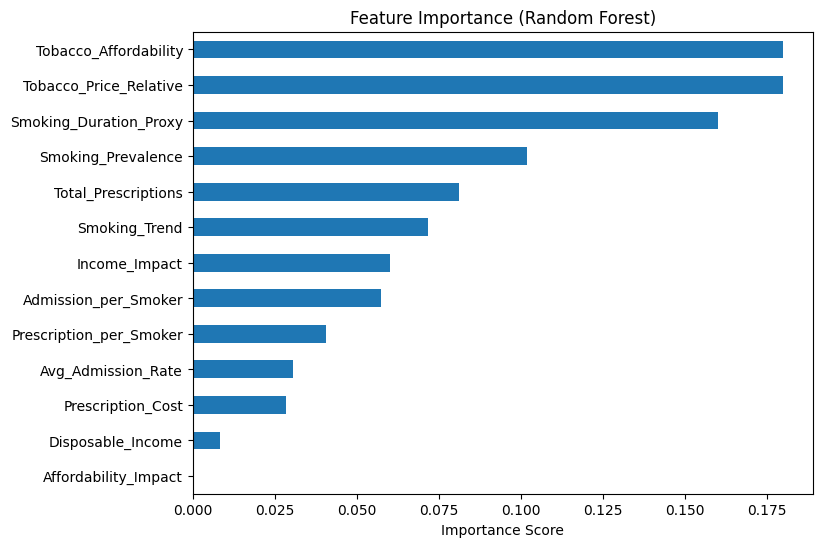

In [ ]:
# Feature importance from the best Random Forest model
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
# Display feature importance values
pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)


Tobacco_Price_Relative     0.180000
Tobacco_Affordability      0.180000
Smoking_Duration_Proxy     0.160000
Smoking_Prevalence         0.101917
Total_Prescriptions        0.081000
                             ...   
Prescription_per_Smoker    0.040583
Avg_Admission_Rate         0.030667
Prescription_Cost          0.028333
Disposable_Income          0.008333
Affordability_Impact       0.000000
Length: 13, dtype: float64

In [ ]:
# SHAP values for the best Random Forest model
import shap

explainer = shap.TreeExplainer(best_rf)

shap_values = explainer.shap_values(X_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
type(shap_values), len(shap_values) if isinstance(shap_values, list) else shap_values.shape


(numpy.ndarray, (7, 13, 2))

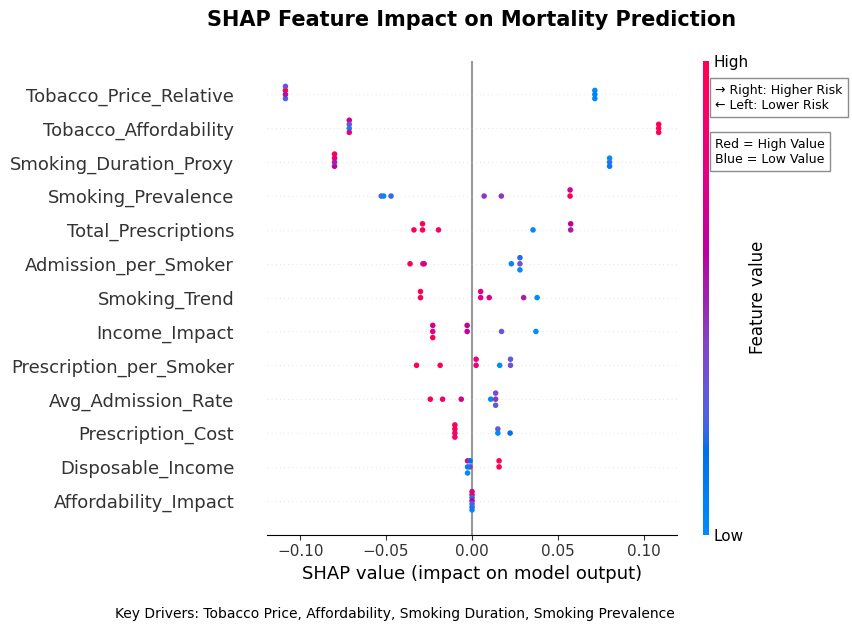

In [ ]:
# Visualize SHAP summary plot for the class representing high mortality years
import matplotlib.pyplot as plt

shap_class1 = shap_values[:, :, 1]

plt.figure(figsize=(13,8))
shap.summary_plot(
    shap_class1,
    X_train,
    max_display=len(X_train.columns),
    show=False
)

plt.title("SHAP Feature Impact on Mortality Prediction", fontsize=15, pad=25, weight='bold')

fig = plt.gcf()

fig.text(
    0.90, 0.78,
    "→ Right: Higher Risk\n← Left: Lower Risk",
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray')
)

fig.text(
    0.90, 0.70,
    "Red = High Value\nBlue = Low Value",
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray')
)

fig.text(
    0.5, 0.02,
    "Key Drivers: Tobacco Price, Affordability, Smoking Duration, Smoking Prevalence",
    fontsize=10,
    ha='center'
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


In [ ]:
# Save the best model using joblib
import joblib

joblib.dump(best_rf, "random_forest_mortality_model.pkl")
print("Model saved successfully!")


Model saved successfully!
